In [5]:
%cd ..

C:\Users\euare\repositories\cpc


In [6]:
from src.api import *
from src.curveproduction.cost_potential_curve import *
initialize()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:root:Starting harmonization
INFO:root:Calculating cost values
INFO:root:Creating power plant input file
INFO:root:Creating power plant cost potential file
INFO:root:Creating iron and steel cost potential file
INFO:root:Creating cement cost potential file


In [7]:
distribution = cost_emission_distribution(["basic", "cement", "iron"])
distribution

C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:209: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.centroid.x
C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:210: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.centroid.y


Cost potential distribution in dataframe form

In [8]:
curve = CostCurve.from_distribution(distribution)
data = curve.curve

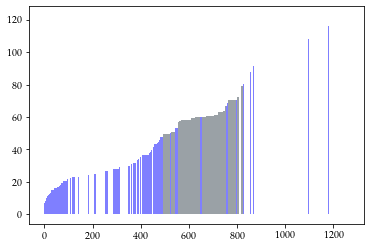

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=True)
fig, ax = plt.subplots()
ax.fill_between(data["amount"], data["cost"], where=data.source == "Lignite", facecolor= "#36454F", alpha=0.5)
ax.fill_between(data["amount"], data["cost"], where=data.source == "Cement", facecolor= "blue", alpha=0.5)

In [10]:
uniques = data.source.unique()
colors = {"Cement": "#36454F",
          "IronSteel": "#89CFF0",
          "Lignite": "#CD7F32",
          "Bioenergy": "#228B22",
          "Hard Coal": "#000000",
          "Natural Gas": "#800000"}

Text(0.5, 0, 'Potential - MtCO2/a')

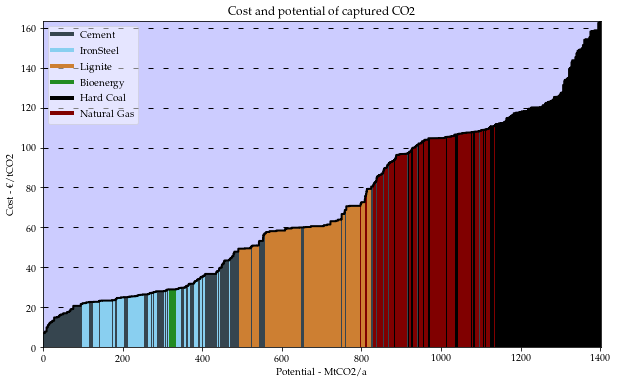

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.grid(axis="y", linestyle= "--", color = "black", dashes=(5, 10), linewidth=1, zorder=0)
ax.set_axisbelow(True)
for source in uniques:    
    ax.fill_between(data["amount"], data["cost"], where=data.source == source, facecolor= colors[source])
ax.plot(data["amount"], data["cost"], color ="black", linewidth=2)    
custom_lines = [Line2D([0], [0], color=c, lw=4) for k, c in colors.items()]
ax.set_xlim([0,max(data["amount"])])
ax.set_ylim([0,max(data["cost"])])
ax.set_facecolor('#CCCCFF')
ax.legend(custom_lines, [k for k in colors.keys()], framealpha=0.5)
ax.set_title("Cost and potential of captured CO2")
ax.set_ylabel("Cost - €/tCO2")
ax.set_xlabel("Potential - MtCO2/a")

In [173]:
uniques

array(['Cement', 'IronSteel', 'Lignite', 'Bioenergy', 'Hard Coal',
       'Natural Gas'], dtype=object)

In [132]:
data

,source,cost,variable,amount
0,Cement,6.937014,lower,0.000000
1,Cement,6.937014,upper,4.621946
2,Cement,7.722348,lower,4.621946
3,Cement,7.722348,upper,8.773856
4,Cement,9.836554,lower,8.773856
...,...,...,...,...
3131,IronSteel,136.596310,upper,1748.625830
3132,IronSteel,NaN,upper,1748.625830
3133,IronSteel,NaN,upper,1748.625830
3134,IronSteel,NaN,lower,1748.625830
